Please Print your name and Student Id
Format: NameL < > and ID: < >

In [ ]:
print("Ulugbek Shernazarov and ID: st125457")

Ulugbek Shernazarov and ID: st125457


## Task 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import display
import re
from scipy.stats import kurtosis, skew

In [ ]:
# Load the datasets

df_cov = pd.read_excel('COVID19_2020_open_line_list.xlsx')
df_ml = pd.read_csv('covid_ml.csv')

In [ ]:
df_cov.columns

Index(['ID', 'city', 'province', 'country', 'wuhan(0)_not_wuhan(1)',
       'latitude', 'longitude', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'lives_in_Wuhan',
       'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'additional_information',
       'chronic_disease_binary', 'chronic_disease', 'source',
       'sequence_available', 'outcome'],
      dtype='object')

In [ ]:
df_ml.columns

Index(['ID', 'age', 'sex', 'cough', 'fever', 'chills', 'sore_throat',
       'headache', 'fatigue', 'urgency_of_admission',
       'days_onset_to_admission', 'symptoms', 'geo_resolution'],
      dtype='object')

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       861 non-null    object 
 1   age                      845 non-null    float64
 2   sex                      850 non-null    object 
 3   cough                    861 non-null    object 
 4   fever                    861 non-null    object 
 5   chills                   861 non-null    object 
 6   sore_throat              861 non-null    object 
 7   headache                 861 non-null    object 
 8   fatigue                  861 non-null    object 
 9   urgency_of_admission     861 non-null    object 
 10  days_onset_to_admission  641 non-null    float64
 11  symptoms                 428 non-null    object 
 12  geo_resolution           861 non-null    object 
dtypes: float64(2), object(11)
memory usage: 87.6+ KB


In [ ]:
df_ml.age.unique()

array([30., 47., 49., 50., 42., 59., 38., 45., nan, 44., 65., 21., 41.,
       43., 40., 66., 36., 63., 37., 78., 76., 48., 62., 46., 34., 72.,
       20., 54., 33.,  2., 29., 61., 51., 39., 56., 27., 52., 28., 23.,
       31., 53., 55., 32., 24., 25., 22., 60., 35., 64., 70., 68., 67.,
       16., 26.,  3., 71., 80., 77., 73., 75., 57., 10., 74.,  5., 69.,
        9., 83.,  1.,  0.,  7., 79., 13., 96., 58., 18., 85., 12.])

In [ ]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        999 non-null    object 
 1   city                      870 non-null    object 
 2   province                  822 non-null    object 
 3   country                   983 non-null    object 
 4   wuhan(0)_not_wuhan(1)     999 non-null    int64  
 5   latitude                  999 non-null    float64
 6   longitude                 999 non-null    float64
 7   date_onset_symptoms       20 non-null     object 
 8   date_admission_hospital   22 non-null     object 
 9   date_confirmation         999 non-null    object 
 10  lives_in_Wuhan            24 non-null     object 
 11  travel_history_dates      25 non-null     object 
 12  travel_history_location   33 non-null     object 
 13  reported_market_exposure  5 non-null      object 
 14  additional

In [ ]:
df_cov.date_onset_symptoms = pd.to_datetime(df_cov.date_onset_symptoms)
df_cov.date_confirmation = pd.to_datetime(df_cov.date_confirmation)
df_cov.date_admission_hospital = pd.to_datetime(df_cov.date_admission_hospital)

df_cov.date_admission_hospital.dtype, df_cov.date_onset_symptoms.dtype, df_cov.date_confirmation.dtype

<ipython-input-528-7a313184dd5e>:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cov.date_onset_symptoms = pd.to_datetime(df_cov.date_onset_symptoms)
<ipython-input-528-7a313184dd5e>:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cov.date_confirmation = pd.to_datetime(df_cov.date_confirmation)
<ipython-input-528-7a313184dd5e>:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cov.date_admission_hospital = pd.to_datetime(df_cov.date_admission_hospital)


(dtype('<M8[ns]'), dtype('<M8[ns]'), dtype('<M8[ns]'))

In [ ]:
df_ml.drop(columns=['geo_resolution'], inplace=True)

In [ ]:
df_cov.travel_history_dates.unique()

array(['17.01.2020', '21.01.2020', '29.12.2019 - 04.01.2020', nan,
       '25.01.2020', '16.01.2020 - 23.02.2020', '28.01.2020 - 29.01.2020',
       '22.01.2020 - 23.01.2020', '21.01.2020 - 23.012020', '18.01.2020',
       '01.02.2020', '13.02.2020', '23.01.2020', '22.01.2020',
       '13.01.2020 - 15.01.2020', '24.01.2020', '03.02.2020',
       '30.01.2020'], dtype=object)

In [ ]:
# Extract travel_start_date and travel_end_date from travel_history_dates if the second date not given keep it as None/null
extract = df_cov.travel_history_dates.str.split(' - ', expand=True)
df_cov['travel_start_date'] = extract[0]
df_cov['travel_end_date'] = extract[1]

df_cov.drop(columns=['travel_history_dates'], inplace=True)

df_cov.travel_start_date = pd.to_datetime(df_cov.travel_start_date)
# df_cov.travel_end_date = pd.to_datetime(df_cov.travel_end_date)

df_cov.travel_start_date.unique(), df_cov.travel_end_date.unique()

<ipython-input-531-8374c1ff6de5>:8: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cov.travel_start_date = pd.to_datetime(df_cov.travel_start_date)


(<DatetimeArray>
 ['2020-01-17 00:00:00', '2020-01-21 00:00:00', '2019-12-29 00:00:00',
                  'NaT', '2020-01-25 00:00:00', '2020-01-16 00:00:00',
  '2020-01-28 00:00:00', '2020-01-22 00:00:00', '2020-01-18 00:00:00',
  '2020-02-01 00:00:00', '2020-02-13 00:00:00', '2020-01-23 00:00:00',
  '2020-01-13 00:00:00', '2020-01-24 00:00:00', '2020-02-03 00:00:00',
  '2020-01-30 00:00:00']
 Length: 16, dtype: datetime64[ns],
 array([None, '04.01.2020', nan, '23.02.2020', '29.01.2020', '23.01.2020',
        '23.012020', '15.01.2020'], dtype=object))

In [ ]:
# Convert age column to numeric keeping only the numeric part when required
# df_ml.age = df_ml.age.str.extract('(\d+)').astype(float)
df_ml.age

,age
0,30.0
1,47.0
2,49.0
3,47.0
4,50.0
...,...
856,40.0
857,40.0
858,25.0
859,22.0


In [ ]:
Required_cols = ['age', 'sex', 'cough', 'fever', 'chills', 'sore_throat', 'headache',
       'fatigue', 'urgency_of_admission', 'days_onset_to_admission', 'city',
       'province', 'country', 'latitude', 'longitude', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation']

# Merge datasets using 'id' column
df = pd.merge(df_cov, df_ml, on='ID', how='right')
df_ml.shape, df_cov.shape, df.shape

((861, 12), (999, 21), (861, 32))

## Task 2

In [ ]:
# Load the dataset
df = pd.read_csv('final_df_use.csv')
# See first 5 rows
df.head()

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,urgency_of_admission,days_onset_to_admission,city,province,country,latitude,longitude,date_onset_symptoms,date_admission_hospital,date_confirmation
0,30,male,No,No,No,No,No,No,Low,2,"Chaohu City, Hefei City",Anhui,China,31.64696,117.7166,1/18/2020,1/20/2020,1/22/2020
1,47,male,No,No,No,No,No,No,Low,11,"Baohe District, Hefei City",Anhui,China,31.79444,117.3428,1/17/2020,1/22/2020,1/23/2020
2,49,male,No,No,No,No,No,No,Low,5,"High-Tech Zone, Hefei City",Anhui,China,22.65389,114.1291,1/3/2020,1/10/2020,1/21/2020
3,47,female,No,No,No,No,No,No,Low,3,"High-Tech Zone, Hefei City",Anhui,China,32.19750,121.0053,NaN,NaN,1/26/2020
4,50,female,No,No,No,No,No,No,Low,11,"Feidong County, Hefei City",Anhui,China,34.35680,117.5145,NaN,NaN,2/15/2020


In [ ]:
# We only have 4 numeric features - wow
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      856 non-null    int64  
 1   sex                      846 non-null    object 
 2   cough                    856 non-null    object 
 3   fever                    856 non-null    object 
 4   chills                   856 non-null    object 
 5   sore_throat              856 non-null    object 
 6   headache                 856 non-null    object 
 7   fatigue                  856 non-null    object 
 8   urgency_of_admission     856 non-null    object 
 9   days_onset_to_admission  856 non-null    int64  
 10  city                     737 non-null    object 
 11  province                 700 non-null    object 
 12  country                  842 non-null    object 
 13  latitude                 856 non-null    float64
 14  longitude                8

In [ ]:
# Statistics
df.describe()

,age,days_onset_to_admission,latitude,longitude
count,856.000000,856.000000,856.000000,856.000000
mean,45.092290,2.914720,33.516658,125.506102
std,17.432433,4.675527,4.921205,17.999565
min,0.000000,-50.000000,13.853800,-118.250000
25%,33.000000,0.000000,28.776930,115.441800
50%,45.000000,1.000000,35.450850,121.618900
75%,59.000000,5.000000,35.450850,139.665100
max,96.000000,33.000000,49.717850,139.665100


In [ ]:
# Columns
df.columns

Index(['age', 'sex', 'cough', 'fever', 'chills', 'sore_throat', 'headache',
       'fatigue', 'urgency_of_admission', 'days_onset_to_admission', 'city',
       'province', 'country', 'latitude', 'longitude', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation'],
      dtype='object')

In [ ]:
df.shape

(856, 18)

### Null values

In [ ]:
# Checking what fields have null values
df.isna().sum().sort_values(ascending=False)

# We have 90% of data null for two features - date_onset_symptoms and date_admission_hospital
# Only idea is to drop those features

# For other we can see the distribution and decide to fill with mean/median

,0
date_onset_symptoms,839
date_admission_hospital,837
province,156
city,119
country,14
sex,10
age,0
longitude,0
latitude,0
days_onset_to_admission,0


In [ ]:
# The hint is strange - it was said to for date_confirmation we fill with date_admission_hospital if there is null values
# Therefore, I will be droping this feature/column - but if it is typo, and it was said to fill vice versa - this is deal

# Upd: after proceeding to task3, I noticed that we need date_admission_hospital column
# Therefore, I will fill it with date_admission_hospital values

df.date_confirmation.unique(), df.date_admission_hospital.unique()

(array(['1/22/2020', '1/23/2020', '1/21/2020', '1/26/2020', '2/15/2020',
        '2/16/2020', '2/8/2020', '2/13/2020', '2/7/2020', '2/3/2020',
        '2/14/2020', '2/12/2020', '2/10/2020', '2/11/2020', '2/9/2020',
        '2/17/2020', '2/18/2020', '2/4/2020', '2/6/2020'], dtype=object),
 array(['1/20/2020', '1/22/2020', '1/10/2020', nan, '1/11/2020',
        '1/24/2020', '2/3/2020', '2/4/2020', '1/30/2020', '2/14/2020',
        '1/15/2020', '2/17/2020', '1/25/2020', '2/13/2020', '2/10/2020'],
       dtype=object))

In [ ]:
# Samely, lets check date_onset_symptoms
df.date_onset_symptoms.unique()

array(['1/18/2020', '1/17/2020', '1/3/2020', nan, '1/1/2020', '1/23/2020',
       '2/8/2020', '2/1/2020', '1/8/2020', '1/2/2020', '2/14/2020',
       '1/22/2020', '1/25/2020', '2/3/2020'], dtype=object)

In [ ]:
# Let's see the first row
df.head(1)

# By observing it and thinking logically, I would say two dates based on onset_syptom and admission_hospital are useless, and we simply
# Consider only date_confirmation - which usually happens later then both provided earlier - to justify

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,urgency_of_admission,days_onset_to_admission,city,province,country,latitude,longitude,date_onset_symptoms,date_admission_hospital,date_confirmation
0,30,male,No,No,No,No,No,No,Low,2,"Chaohu City, Hefei City",Anhui,China,31.64696,117.7166,1/18/2020,1/20/2020,1/22/2020


In [ ]:
# So I will simply drop those fields
# Old one
# df.drop(columns=['date_admission_hospital', 'date_onset_symptoms'], inplace=True)

df.date_admission_hospital.fillna(df.date_confirmation, inplace=True)

# New
df.drop(columns=['date_onset_symptoms'], inplace=True)

df.columns

Index(['age', 'sex', 'cough', 'fever', 'chills', 'sore_throat', 'headache',
       'fatigue', 'urgency_of_admission', 'days_onset_to_admission', 'city',
       'province', 'country', 'latitude', 'longitude',
       'date_admission_hospital', 'date_confirmation'],
      dtype='object')

In [ ]:
# So the thing is it has more None values then the most province - Shaanxi - 86
# It has 156 none values
# Which is bad idea to fill with mean/medians since it will create unaccurate considerations
# I think filling with mean/median is appropriate if mean/median is preleading the number of null values
# Therefore, I consider to dropping this column as well
df.province.value_counts()

,count
province,
Shaanxi,86
Anhui,82
Hokkaido,55
Gansu,51
Beijing,39
...,...
Selangor,1
Washington,1
Okinawa,1


In [ ]:
df.drop(columns=['province'], inplace=True)

df.columns

Index(['age', 'sex', 'cough', 'fever', 'chills', 'sore_throat', 'headache',
       'fatigue', 'urgency_of_admission', 'days_onset_to_admission', 'city',
       'country', 'latitude', 'longitude', 'date_admission_hospital',
       'date_confirmation'],
      dtype='object')

In [ ]:
# Same for City column as for province column
# Will be dropping this column out - hope city/province does not make a lot of effort, even though it will create bias without location
# Even though we still have country column which can eliminate this bias in some term
df.city.value_counts()

,count
city,
National Centre for Infectious Diseases,68
Beijing,23
Hefei City,22
Xi'an City,22
Hong Kong,19
...,...
"Lixian County, Longnan City",1
"Qinzhou District, Tianshui City",1
"Block 1, Site 11, Whampao Garden",1


In [ ]:
df.drop(columns=['city'], inplace=True)

df.columns

Index(['age', 'sex', 'cough', 'fever', 'chills', 'sore_throat', 'headache',
       'fatigue', 'urgency_of_admission', 'days_onset_to_admission', 'country',
       'latitude', 'longitude', 'date_admission_hospital',
       'date_confirmation'],
      dtype='object')

In [ ]:
# We left only sex - 10 and country - 14 null values, since both columns are categorical
# I will proceed with mode
df.sex.fillna(df.sex.mode()[0], inplace=True)
df.country.fillna(df.country.mode()[0], inplace=True)

df.isna().sum()
# So we left no missing values

,0
age,0
sex,0
cough,0
fever,0
chills,0
sore_throat,0
headache,0
fatigue,0
urgency_of_admission,0
days_onset_to_admission,0


In [ ]:
# Outliers for numeric columns
for feat in num_df.columns:
    Q1 = num_df[feat].quantile(0.25)
    Q3 = num_df[feat].quantile(0.75)
    IQR = Q3 - Q1

    outliers = num_df[(num_df[feat] < Q1 - 1.5 * IQR) | (num_df[feat] > Q3 + 1.5 * IQR)]

    print(f"Feature: {feat}, outliers: {outliers.shape[0]}")

Feature: age, outliers: 0
Feature: days_onset_to_admission, outliers: 29
Feature: latitude, outliers: 18
Feature: longitude, outliers: 4


In [ ]:
num_df = df.select_dtypes(include=['float64', 'int64'])
# Task 2
num_df.describe()

,age,days_onset_to_admission,latitude,longitude
count,856.000000,856.000000,856.000000,856.000000
mean,45.092290,2.914720,33.516658,125.506102
std,17.432433,4.675527,4.921205,17.999565
min,0.000000,-50.000000,13.853800,-118.250000
25%,33.000000,0.000000,28.776930,115.441800
50%,45.000000,1.000000,35.450850,121.618900
75%,59.000000,5.000000,35.450850,139.665100
max,96.000000,33.000000,49.717850,139.665100


In [ ]:
# Also let's make days_onset_to_admission datetime
df.date_confirmation = pd.to_datetime(df.date_confirmation)
df.date_admission_hospital = pd.to_datetime(df.date_admission_hospital)

df.date_confirmation.dtype, df.date_admission_hospital.dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

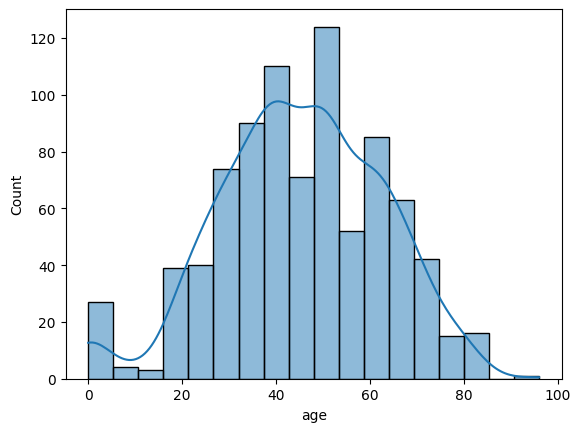

In [ ]:
# Task 3 of task2
sns.histplot(df.age, kde=True)
plt.show()

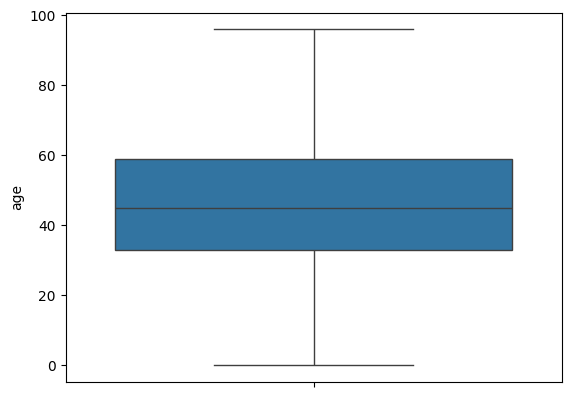

In [ ]:
sns.boxplot(df.age)
plt.show()

In [ ]:
df.days_onset_to_admission.min()

-50

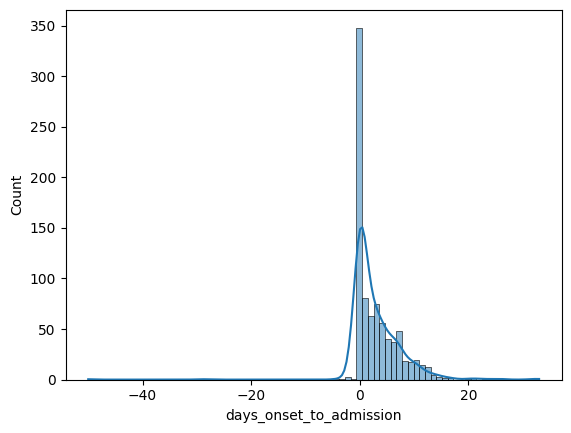

In [ ]:
sns.histplot(df.days_onset_to_admission, kde=True)
plt.show()

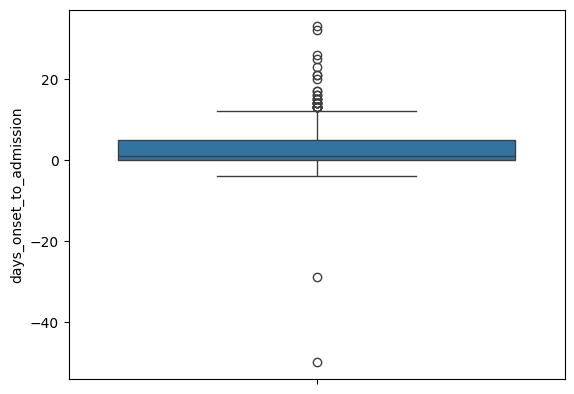

In [ ]:
# As we can see it has outliers
sns.boxplot(df.days_onset_to_admission)
plt.show()

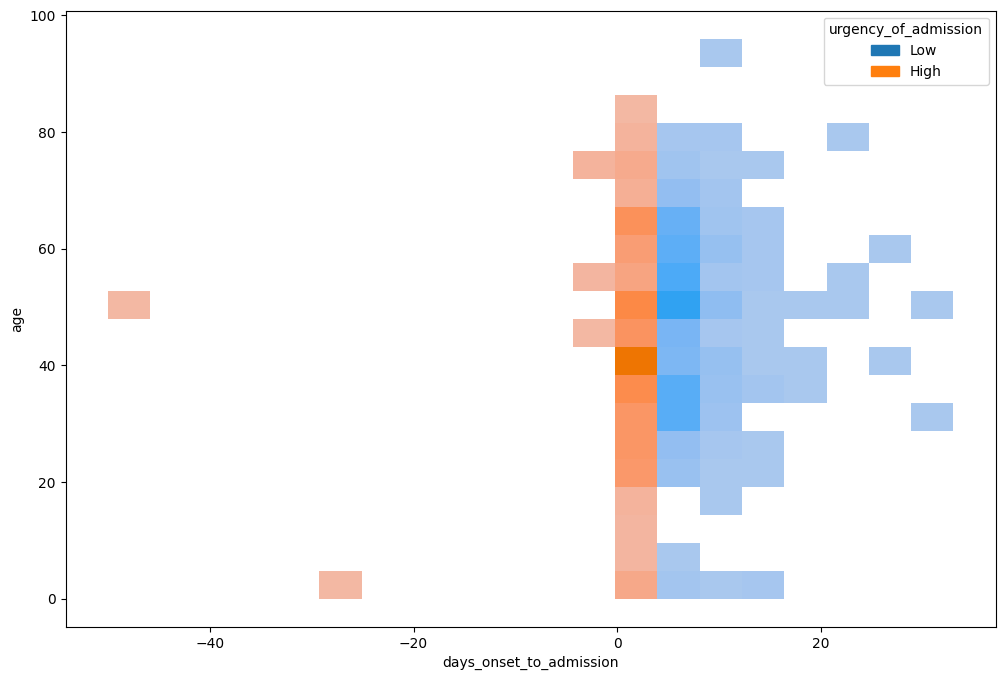

In [ ]:
plt.figure(figsize=(12, 8))

sns.histplot(x='days_onset_to_admission', y ='age', data=df, bins=20, hue='urgency_of_admission')
plt.show()

In [ ]:
# Task2-4
print("Age skewness: ", df.age.skew())
print("Days_onset_to_admission skewness: ", df.days_onset_to_admission.skew())

print("\nAge and Days_onset_to_admission skewness: ", df[['age', 'days_onset_to_admission']].skew(), sep='\n')

Age skewness:  -0.25375995099086995
Days_onset_to_admission skewness:  -0.3758282206808385

Age and Days_onset_to_admission skewness: 
age                       -0.253760
days_onset_to_admission   -0.375828
dtype: float64


In [ ]:
# Task2-4
print("Age kurtosis: ", df.age.kurtosis())
print("Days_onset_to_admission kurtosis: ", df.days_onset_to_admission.kurtosis())

print("\nAge and Days_onset_to_admission kurtosis: ", df[['age', 'days_onset_to_admission']].kurtosis(), sep='\n')

Age kurtosis:  -0.046304086244087106
Days_onset_to_admission kurtosis:  26.495733823146722

Age and Days_onset_to_admission kurtosis: 
age                        -0.046304
days_onset_to_admission    26.495734
dtype: float64


Task2-6

In task2-2, we can see some statistics regarding the numeric features including the info regarding outliers, what are our max/min values, quartiles. It is useful way to make first insights from statistics.

In task2-3, the histogram of both features (bin=20) looks not normal - the column days_onset_to_admission has outliers, and those outliers making sense. In earlier plotted distribution (boxplot, histplot) per each feature, we can notice that the negative outliers of this column making sense on distribution (need to convert them into 0 - probably not the best idea).

In task2-4, the skewness values are:
```
Age and Days_onset_to_admission skewness:
age                       -0.253760
days_onset_to_admission   -0.375828
```
Which tells are that there are little skew in distribution to negative side.

In task2-5, the kurtosis values are:
```
Age and Days_onset_to_admission kurtosis:
age                        -0.046304
days_onset_to_admission    26.495734
```
So the normal distribution should have kurtosis=3, but for days_onset_to_admission because of outliers - this value is abnormal. Removing those outlier data would normalize the distribution - leptokurtic, and age distribution is platykurtic (< 3)

## Task 3


In [ ]:
# Task 3-1
# Find the first three patients based on 'date_admission_hospital' for each country (oldest at first/ ascending)
first_three_patients = df.groupby('country').apply(lambda x: x.nsmallest(3, 'date_admission_hospital')).reset_index(drop=True).sort_values(by=['date_admission_hospital'], ascending=True)
first_three_patients[['country', 'date_admission_hospital', 'sex']]

,country,date_admission_hospital,sex
11,China,2020-01-10,male
43,Singapore,2020-01-11,male
12,China,2020-01-11,male
13,China,2020-01-15,female
44,Singapore,2020-01-21,female
...,...,...,...
42,Romania,2020-02-17,female
41,Romania,2020-02-17,male
50,Spain,2020-02-17,male
14,Croatia,2020-02-17,male


In [ ]:
# Task3-2
# Find for each country the total number of patients, the total number of patients based on sex.
total_num = df.groupby(['country', 'sex']).size().reset_index(name='total_num')
total_num

,country,sex,total_num
0,Australia,female,6
1,Australia,male,13
2,Bhutan,male,1
3,Brazil,female,2
4,Brazil,male,1
5,Cambodia,male,1
6,Canada,female,2
7,Canada,male,3
8,China,female,202
9,China,male,241


In [ ]:
# Determine the number of unique admission dates 'date_admission_hospital' per country
unique_dates = df.groupby(['country'])['date_admission_hospital'].nunique().reset_index(name='unique_dates')
unique_dates

,country,unique_dates
0,Australia,6
1,Bhutan,1
2,Brazil,2
3,Cambodia,1
4,Canada,4
5,China,19
6,Croatia,1
7,Finland,2
8,France,1
9,Germany,6


## Task 4

In [ ]:
# Task4-1
# Lets encode categorical variables, and see correlation matrix
# Scaling values
from sklearn.preprocessing import StandardScaler

num_df = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaled_num_df = scaler.fit_transform(num_df)
scaled_num_df = pd.DataFrame(scaled_num_df, columns=num_df.columns)
scaled_num_df.head()

,age,days_onset_to_admission,latitude,longitude
0,-0.866265,-0.195754,-0.380149,-0.433014
1,0.109499,1.730288,-0.350163,-0.453793
2,0.224294,0.446260,-2.208630,-0.632441
3,0.109499,0.018250,-0.268213,-0.250197
4,0.281692,1.730288,0.170819,-0.444248


In [ ]:
# Encoding categorical values
from sklearn.preprocessing import LabelEncoder

cat_df = df.select_dtypes(include=['object'])

le = LabelEncoder()
for col in cat_df.columns:
    cat_df[col] = le.fit_transform(cat_df[col])

cat_df.head()

,sex,cough,fever,chills,sore_throat,headache,fatigue,urgency_of_admission,country
0,1,0,0,0,0,0,0,1,5
1,1,0,0,0,0,0,0,1,5
2,1,0,0,0,0,0,0,1,5
3,0,0,0,0,0,0,0,1,5
4,0,0,0,0,0,0,0,1,5


In [ ]:
# Concatenate both categorical and numerical fields
df_final = pd.concat([scaled_num_df, cat_df], axis=1)
df_final.head()

,age,days_onset_to_admission,latitude,longitude,sex,cough,fever,chills,sore_throat,headache,fatigue,urgency_of_admission,country
0,-0.866265,-0.195754,-0.380149,-0.433014,1,0,0,0,0,0,0,1,5
1,0.109499,1.730288,-0.350163,-0.453793,1,0,0,0,0,0,0,1,5
2,0.224294,0.446260,-2.208630,-0.632441,1,0,0,0,0,0,0,1,5
3,0.109499,0.018250,-0.268213,-0.250197,0,0,0,0,0,0,0,1,5
4,0.281692,1.730288,0.170819,-0.444248,0,0,0,0,0,0,0,1,5


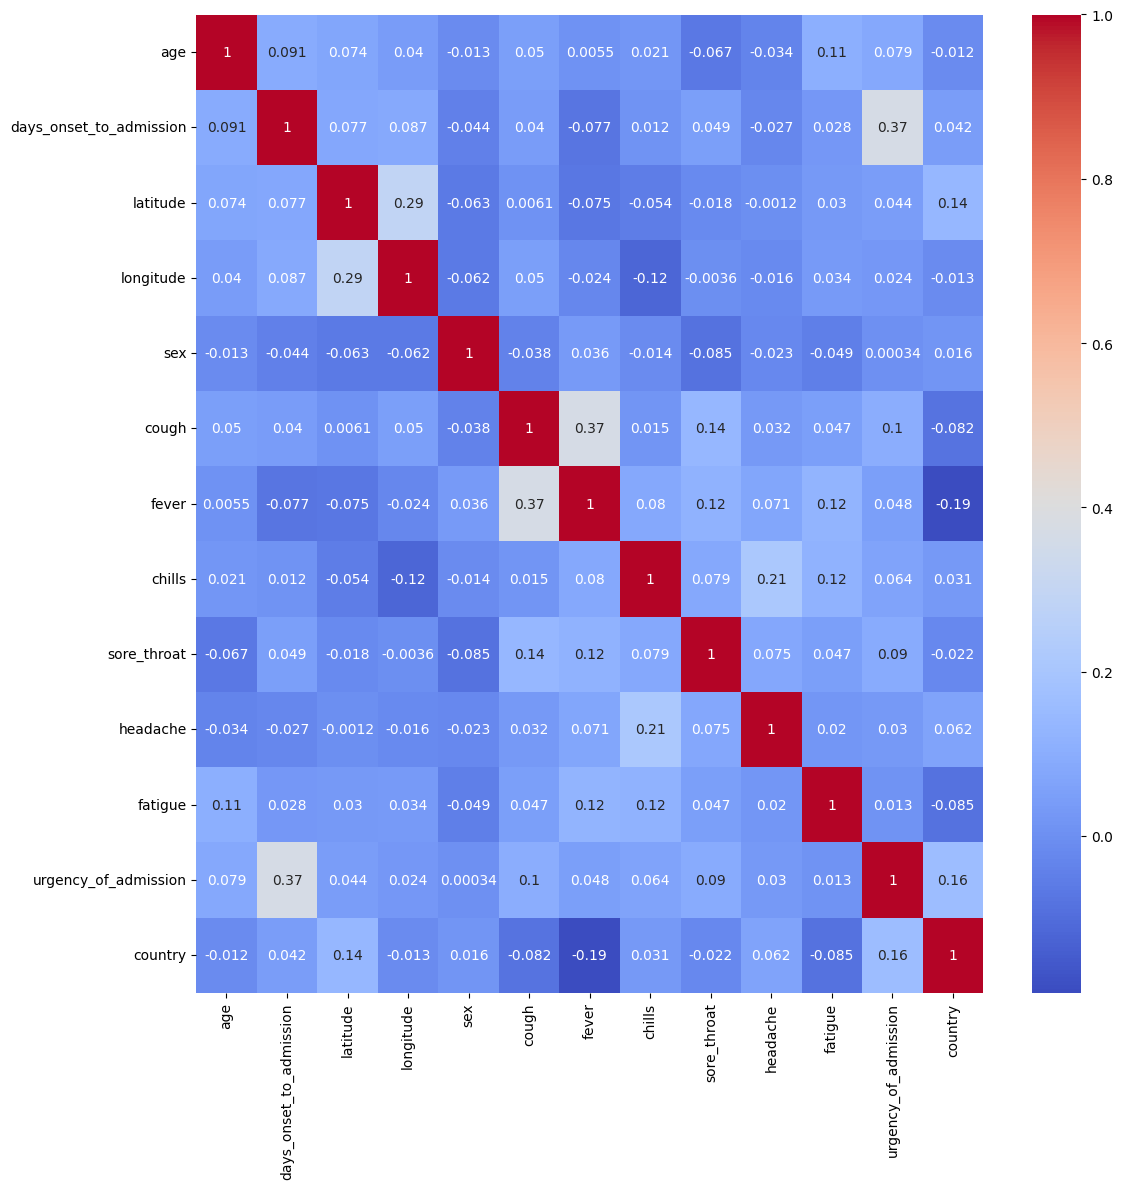

In [ ]:
# Plotting confusion matrix
plt.figure(figsize=(12, 12))
corr_matrix = df_final.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.tight_layout()

So we can see that our target=urgency_of_admission is mostly dependent on days_onset_to_admission - correlation.

In [ ]:
# Splitting data into sets
from sklearn.model_selection import train_test_split

X = df_final.drop(columns=['urgency_of_admission'])
y = df_final['urgency_of_admission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [ ]:
X_train.shape, X_test.shape

((684, 12), (172, 12))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8255813953488372


## Task 5

In [ ]:
# Analyzing the model in terms of accuracy, f1-score, recall, and confusion matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.58      0.67        52
           1       0.84      0.93      0.88       120

    accuracy                           0.83       172
   macro avg       0.81      0.76      0.77       172
weighted avg       0.82      0.83      0.82       172



Text(120.72222222222221, 0.5, 'True')

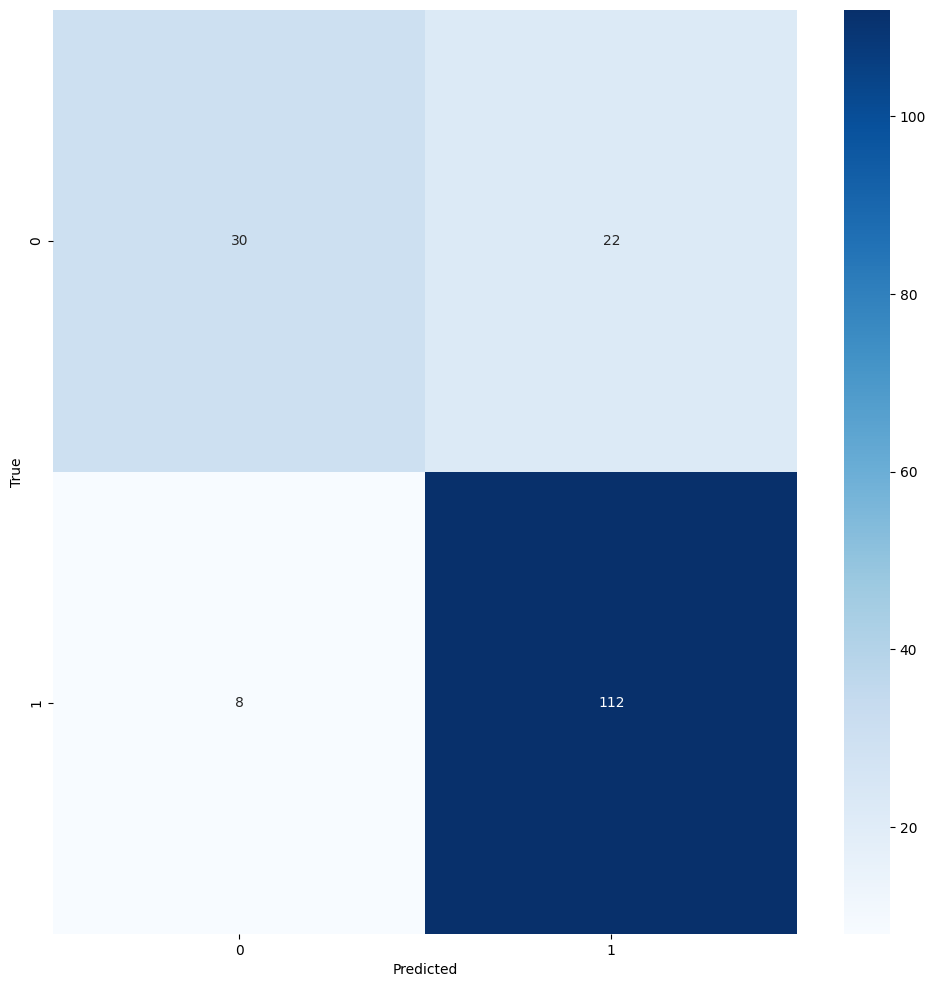

In [ ]:
# Visualization of classifier
plt.figure(figsize=(12, 12))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
# Analyze the hyperparameters
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Task5-1
1. Accuracy is 0.83 - which is not bad result for this classifier, we can see that the distribution of low/high (or in case of encoded ones - 0/1) are not balanced, which cause issues with f1-score and recall - both classes have different values. Confussion matrix is showing us TP, TN, FP, FN case classifications of our data points. Even though, the performance on test set is not bad.
2. Model hyperparameters:
```
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}
```
Most of parameters are default (which are performing good - if we want to increase the accuracy, we can try other hyper parameters - but in our case it does not make a lot of sense - it is up to the quality of dataset and number of points). Using most popular n_neighbors which is default=5, metric is minkowski, leaf_size is 30, p is 2. Weights are uniformly distributed.